In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import h5py as h5
from stemutils.io import *
import hyperspy.api as hs

In [3]:
root = Path('/dls/i08/data/2022/mg32587-1/processing/')

In [4]:
root.walk()

[Path('/dls/i08/data/2022/mg32587-1/processing/68025c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68138c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68068c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68049c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68112c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/I0_060.csv'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68094c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68060c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68158c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68095c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68156c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68107c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/thorondor/68028m_spectrum.csv'),
 Path('/dls/i08/data/2022/mg32587-1/processing/thorondor/68028m_spectrum.pdf'),
 Path('/dls/i08/data/2022/mg32587-1/processing/thorondor/DataFolder/Na/68025c.nxs'),
 Path('/dls/i08/data/20

In [5]:
fp = root.walk('094c.nxs')[0]

In [6]:
with h5.File(fp) as f:
    #print(f['entry']['scan_shape'])
    fdata = f['entry1']['Counter1']['data'][()]
    pe = f['entry1']['Counter1']['photon_energy'][()]
    sample_x = f['entry1']['Counter1']['sample_x'][()]
    sample_y = f['entry1']['Counter1']['sample_y'][()]
    print(f['entry1']['Counter1'].keys())

<KeysViewHDF5 ['count_time', 'data', 'photon_energy', 'sample_x', 'sample_y', 'scan_type']>


/home/dto55534/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [7]:
cropx = 3
cropy = 2

In [8]:
fdata = fdata[:,cropx:, cropy:]

In [9]:
step_x = np.mean(np.diff(sample_x))
step_y = np.mean(np.diff(sample_y))

In [10]:
fdata.shape

(164, 7, 8)

In [11]:
sample_y.shape

(10,)

In [12]:
fsig = hs.signals.Signal2D(fdata)

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/pyUSID/viz/__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


<IPython.core.display.Javascript object>


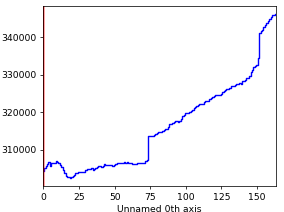

<IPython.core.display.Javascript object>


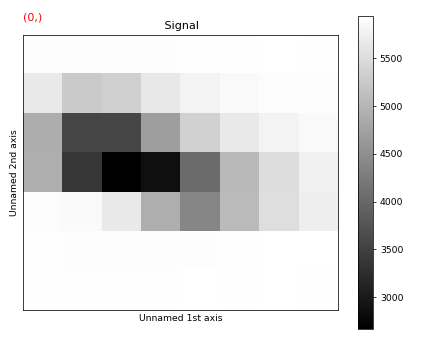

In [13]:
fsig.plot()

In [ ]:
fdata.shape

In [ ]:
th_data = []
thresh_val =0.7
for d in fdata:
    th_data.append(np.where(d< d.max()*thresh_val,1,0))

In [ ]:
th_data = np.asarray(th_data)

In [ ]:
th_data = th_data

In [ ]:
tsig = hs.signals.Signal2D(np.asarray(th_data))

In [ ]:
tsig

In [ ]:
tsig.plot()

In [ ]:
fsig.plot()

In [ ]:
from skimage import filters, feature

In [ ]:
tdata = th_data[0]

In [ ]:
roberts = filters.roberts(tdata.astype('float'))

In [ ]:
bin_rob = np.where(roberts != 0, 1, 0)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from scipy.ndimage.measurements import center_of_mass as com

In [ ]:
plt.figure()
plt.imshow(bin_rob)
com_bin_rob = com(bin_rob)
plt.scatter(com_bin_rob[1], com_bin_rob[0])

In [ ]:
all_rob = np.asarray([np.where(filters.roberts(tdata.astype('float')) != 0, 1,0) for tdata in th_data])
coms = np.asarray([com(rob) for rob in all_rob])

In [ ]:
plt.figure()
plt.scatter(coms[:,0], coms[:,1])

In [ ]:
all_rob_sig = hs.signals.Signal2D(all_rob)

In [ ]:
m = hs.plot.markers.point(x = coms[:,1], y = coms[:,0], color='red')
all_rob_sig.add_marker(m)

In [ ]:
ffsig = hs.signals.Signal2D(fdata)

In [ ]:
m3 = hs.plot.markers.point(x = coms[:,1], y = coms[:,0], color='red')
ffsig.add_marker(m3)


In [ ]:
from scipy.ndimage import shift

In [ ]:
reg_shift = coms - coms[0]

In [ ]:
reg_data = []
for ind, shift_val in enumerate(reg_shift):
    reg_data.append(shift(fdata[ind], -shift_val))

In [ ]:
reg_sig = hs.signals.Signal2D(reg_data)

In [ ]:
reg_sig.plot()

In [ ]:
final_reg_sig = hs.signals.Signal2D(reg_sig.data[:,2:,2:-1])

In [ ]:
final_reg_data = final_reg_sig.data

In [ ]:
final_reg_sig.plot()

In [ ]:
final_reg_data.shape

In [ ]:
sigT_data = final_reg_data.transpose((1,2,0))

In [ ]:
sigT_data.shape

In [ ]:
dict0 = {'axis':pe, 'units': 'eV'}
dict1 = {'axis':np.arange(0, sigT_data.shape[0] * step_x, step_x), 'units': 'um'}
dict2 = {'axis':np.arange(0, sigT_data.shape[1]*step_y, step_y), 'units': 'um'}

In [ ]:
dict2['axis'].shape

In [ ]:
dict1['axis'].shape

In [ ]:
sigT = hs.signals.Signal1D(sigT_data,axes = [dict2, dict1, dict0])

In [ ]:
sigT.axes_manager

In [ ]:
sigT.plot()

In [ ]:
sigT2 = hs.signals.Signal1D(sigT_data)

In [ ]:
sigT2.plot()

In [ ]:
sum_ints = np.sum(final_reg_data, axis = (0))

In [ ]:
sum_ints.shape

In [ ]:
bkg_thresh = 0.98

In [ ]:
bkg_mask = np.where(sum_ints>np.max(sum_ints)*bkg_thresh,1,0)
mask_loc = np.where(sum_ints>np.max(sum_ints)*bkg_thresh)

In [ ]:
mask_loc

In [ ]:
plt.figure()
plt.imshow(bkg_mask)

In [ ]:
mask_coords = np.asarray(mask_loc).T

In [ ]:
all_bkg = []
for mc in mask_coords:
    all_bkg.append(sigT.data[mc[0], mc[1],:])
all_bkg = np.asarray(all_bkg)

In [ ]:
mean_bkg_profile = np.mean(all_bkg, axis = 0)

In [ ]:
hs.signals.Signal1D(all_bkg).plot()

In [ ]:
hs.signals.Signal1D(mean_bkg_profile).plot()

In [ ]:
abs_sig = hs.signals.Signal1D(1-(sigT.data / mean_bkg_profile[None,None,:]))

In [ ]:
hs.signals.Signal1D(1-(sigT.data / mean_bkg_profile[None,None,:]).sum(axis = (0,1))).plot()

In [ ]:
abs_sig.plot()

In [ ]:
abs_sig_en = hs.signals.Signal1D(abs_sig.data,axes = [dict2, dict1, dict0])

In [ ]:
abs_sig_en.plot()

In [ ]:
fp2 = root.walk('095c.nxs')[0]

In [ ]:
with h5.File(fp2) as f:
    #print(f['entry']['scan_shape'])
    fdata2 = f['entry1']['Counter1']['data'][()]
    pe2 = f['entry1']['Counter1']['photon_energy'][()]
    sample_x2 = f['entry1']['Counter1']['sample_x'][()]
    sample_y2 = f['entry1']['Counter1']['sample_y'][()]
    print(f['entry1']['Counter1'].keys())

cropx = 3
cropy = 2

fdata2 = fdata2[:,cropx:, cropy:]

step_x = np.mean(np.diff(sample_x2))
step_y = np.mean(np.diff(sample_y2))

fdata2.shape

sample_y.shape

fsig2 = hs.signals.Signal2D(fdata2)

fdata2.shape

th_data2 = []
thresh_val =0.7
for d in fdata2:
    th_data2.append(np.where(d< d.max()*thresh_val,1,0))

th_data2 = np.asarray(th_data2)

th_data2 = th_data2

tsig2 = hs.signals.Signal2D(np.asarray(th_data2))

tsig2

tsig2.plot()

fsig2.plot()

all_rob2 = np.asarray([np.where(filters.roberts(tdata2.astype('float')) != 0, 1,0) for tdata2 in th_data2])
coms2 = np.asarray([com(rob2) for rob2 in all_rob2])

plt.figure()
plt.scatter(coms2[:,0], coms2[:,1])

all_rob_sig2 = hs.signals.Signal2D(all_rob2)

m = hs.plot.markers.point(x = coms2[:,1], y = coms2[:,0], color='red')
all_rob_sig2.add_marker(m)

ffsig2 = hs.signals.Signal2D(fdata2)

m3 = hs.plot.markers.point(x = coms2[:,1], y = coms2[:,0], color='red')
ffsig2.add_marker(m3)


from scipy.ndimage import shift

reg_shift2 = coms2 - coms2[0]

reg_data2 = []
for ind, shift_val in enumerate(reg_shift2):
    reg_data2.append(shift(fdata2[ind], -shift_val))

reg_sig2 = hs.signals.Signal2D(reg_data2)

reg_sig2.plot()

final_reg_sig2 = hs.signals.Signal2D(reg_sig2.data[:,2:,2:-1])

final_reg_data2 = final_reg_sig2.data

final_reg_sig2.plot()

final_reg_data2.shape

sigT_data2 = final_reg_data2.transpose((1,2,0))

sigT_data2.shape

dict0 = {'axis':pe, 'units': 'eV'}
dict1 = {'axis':np.arange(0, sigT_data.shape[0] * step_x, step_x), 'units': 'um'}
dict2 = {'axis':np.arange(0, sigT_data.shape[1]*step_y, step_y), 'units': 'um'}

dict2['axis'].shape

dict1['axis'].shape

sigT2 = hs.signals.Signal1D(sigT_data2,axes = [dict2, dict1, dict0])

sigT2.axes_manager

sigT2.plot()

sigT22 = hs.signals.Signal1D(sigT_data2)

sigT22.plot()

sum_ints2 = np.sum(final_reg_data2, axis = (0))

sum_ints2.shape

bkg_thresh = 0.98

bkg_mask2 = np.where(sum_ints2>np.max(sum_ints2)*bkg_thresh,1,0)
mask_loc2 = np.where(sum_ints2>np.max(sum_ints2)*bkg_thresh)

plt.figure()
plt.imshow(bkg_mask)

mask_coords2 = np.asarray(mask_loc2).T

all_bkg2 = []
for mc in mask_coords2:
    all_bkg2.append(sigT2.data[mc[0], mc[1],:])
all_bkg2 = np.asarray(all_bkg2)

mean_bkg_profile2 = np.mean(all_bkg2, axis = 0)

hs.signals.Signal1D(all_bkg2).plot()

hs.signals.Signal1D(mean_bkg_profile2).plot()

abs_sig2 = hs.signals.Signal1D(1-(sigT2.data / mean_bkg_profile2[None,None,:]))

hs.signals.Signal1D(1-(sigT2.data / mean_bkg_profile2[None,None,:]).sum(axis = (0,1))).plot()

abs_sig2.plot()

abs_sig_en2 = hs.signals.Signal1D(abs_sig2.data,axes = [dict2, dict1, dict0])

abs_sig_en2.plot()

hs.signals.Signal1D(abs_sig2.data - abs_sig.data).plot()

hs.signals.Signal1D(sigT2.data - sigT.data).plot()

sigT.data.shape

hs.signals.Signal1D((sigT2.data - sigT.data).sum(axis= (0,1))).plot()

diff_spec = fdata.sum(axis = (1,2))- fdata2.sum(axis = (1,2))

hs.signals.Signal1D(fdata.sum(axis = (1,2))).plot()

hs.signals.Signal1D(fdata2.sum(axis = (1,2))).plot()

hs.signals.Signal1D(diff_spec).plot()

